In [1]:
import numpy as np
import os

import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import astropy.units as u
import glob
from ast import literal_eval
import astropy.constants as const
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
import sys

from s1s2_0311 import *
from read import *
from recoil_1223 import *
from plot_binned_detection_1d2d_0526 import *

# atmhepdsnb

In [4]:



aximov_file_name = 'atmhepdsnb_Xe_cfASIMOV_optimized_consecutive_thrd0_S1S2binning.csv'
df_asimov = pd.read_csv(aximov_file_name, index_col = 0 )

DT_file_name =  'atmhepdsnb_Xe_DT_optimized_consecutive_thrd0_numeNa_S1S2binning.csv'
DT_pd = pd.read_csv(DT_file_name, index_col = 0 )

df_asimov

,atm_SURF_high_alpha0.001,atm_SURF_high_alpha0.01,atm_SURF_high_alpha0.1,atm_SURF_low_alpha0.001,atm_SURF_low_alpha0.01,atm_SURF_low_alpha0.1,atm_CJPL_high_alpha0.001,atm_CJPL_high_alpha0.01,atm_CJPL_high_alpha0.1,atm_CJPL_low_alpha0.001,...,dsnb_LNGS_high_alpha0.1,dsnb_LNGS_low_alpha0.001,dsnb_LNGS_low_alpha0.01,dsnb_LNGS_low_alpha0.1,dsnb_SNOlab_high_alpha0.001,dsnb_SNOlab_high_alpha0.01,dsnb_SNOlab_high_alpha0.1,dsnb_SNOlab_low_alpha0.001,dsnb_SNOlab_low_alpha0.01,dsnb_SNOlab_low_alpha0.1
z_thrd,2.629000,1.758446,0.000000,2.697451,1.650226,0.000000,2.722446,1.734862,0.000000,2.689782,...,0.000000,2.647851,1.933093,0.000000,2.917362,1.923388,0.000000,2.792211,1.934688,0.101252
power_z_alter,0.927900,0.920700,0.899100,0.926100,0.925600,0.900300,0.920800,0.925400,0.904000,0.923800,...,0.902200,0.916200,0.906300,0.899900,0.891400,0.903500,0.895300,0.902100,0.897900,0.896400
z_alter_avg,4.682212,3.872127,2.805317,4.711595,3.875651,2.811417,4.632844,3.848589,2.692546,4.634662,...,2.445047,4.307918,3.541358,2.450714,4.333199,3.516826,2.413839,4.314688,3.500823,2.407731


In [5]:
signal_pcles = ['atm', 'hep', 'dsnb']

metallicities = ['high']

colors = ['red', 'purple', 'grey', 'blue', 'orange']
detectors = ['CJPL', 'Kamioka', 'LNGS', 'SURF', 'SNOlab']
alphas = [0.001, 0.01, 0.1 ]
power = 0.9
markers = ["o", "s", "D"]

custom_markers = [Line2D([], [], markersize= 20, color = 'black', linestyle='None', marker = m) for m in markers]
label_markers = [r'$\alpha$ = '+str(alpha) +', power = '+str(power) for alpha in alphas]
custom_colors=[Patch(facecolor=c)  for c in colors[:len(detectors)]]
label_colors = detectors #

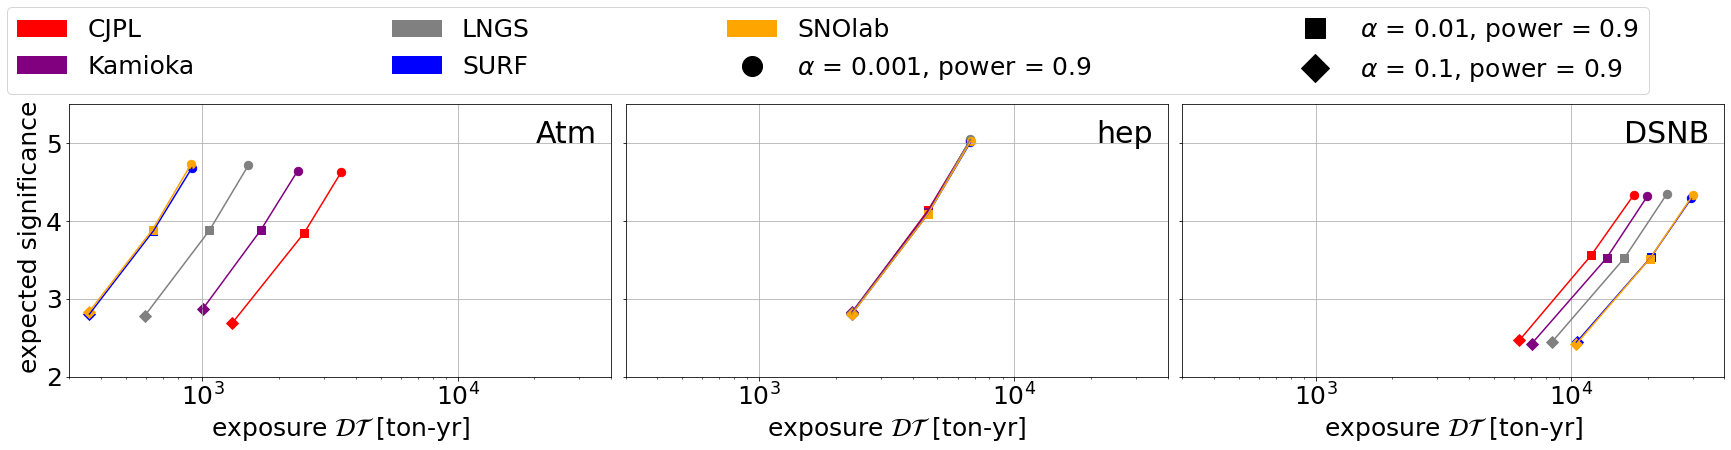

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = len(signal_pcles) ,
                       figsize = (8*len(signal_pcles) ,5),
                      sharey='row')

xlabel = r'exposure ${\cal D}$${\cal T}$ [ton-yr]'

for sig, signal_pcle in enumerate(signal_pcles):
    if sig == 0:#len(signal_pcles)-1:
        ylabel= ' expected significance'
        
    else:
        ylabel= ''
    ax[sig] = setup_cdfpdf_ax(ax[sig], '', 
                   xlabel, ylabel, True, '', 25,25, vlines = [0], hlines = [0],
                                  xlims = [300,40000], ylims = [2, 5.5], log = [1,0])
    ax[sig].text(35000,5.3, get_official_pcle(signal_pcle),
                horizontalalignment='right', verticalalignment='top',fontsize = 30)
    for det, detector in enumerate(detectors):
        for metallicity in metallicities:
            DT_index_ab = [str((alpha, power)) for alpha in alphas]
            ASIMOV_index_a = [signal_pcle + '_'+detector+'_'+metallicity+'_alpha'+str(alpha) for alpha in alphas]

            DTs = DT_pd.loc[DT_index_ab][signal_pcle+'_'+detector+'_'+metallicity]
            avg_zs_simalter = df_asimov.loc['z_alter_avg'][ASIMOV_index_a]
            ax[sig].plot(DTs, avg_zs_simalter, c = colors[det])
            
            for a, alpha in enumerate(alphas):
                ax[sig].scatter(DT_pd.loc[str((alpha, power))][signal_pcle+'_'+detector+'_'+metallicity], 
                                df_asimov.loc['z_alter_avg'][signal_pcle + '_'+detector+'_'+metallicity+'_alpha'+str(alpha)],
                                c = colors[det], marker = markers[a], s = 70
                               )


fig.legend(custom_colors+custom_markers ,label_colors+label_markers,
           bbox_to_anchor=(0, 1.,0.95, .102), loc='lower left',
           ncol=4, mode="expand", borderaxespad=0., fontsize = 25)



fig.tight_layout()

In [7]:

save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'cf_Z_Asimov_optimized_binning.pdf')

print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../phys685/nestfig/cf_Z_Asimov_optimized_binning.pdf


# cnopep

In [59]:

aximov_file_name = 'CNOpep_Xe_cfASIMOV_regular_thrd0_S1S2binning.csv'
df_asimov = pd.read_csv(aximov_file_name, index_col = 0 )

DT_file_name =  'CNOpep_Xe_DT_regular_thrd0_numeNa_S1S2binning.csv'
DT_pd = pd.read_csv(DT_file_name, index_col = 0 )

df_asimov

,CNO_nubb_only_SURF_high_nubb0_alpha0.001,CNO_nubb_only_SURF_high_nubb0_alpha0.01,CNO_nubb_only_SURF_high_nubb0_alpha0.1,CNO_nubb_only_SURF_high_nubb0.0001_alpha0.001,CNO_nubb_only_SURF_high_nubb0.0001_alpha0.01,CNO_nubb_only_SURF_high_nubb0.0001_alpha0.1,CNO_nubb_only_SURF_high_nubb0.001_alpha0.001,CNO_nubb_only_SURF_high_nubb0.001_alpha0.01,CNO_nubb_only_SURF_high_nubb0.001_alpha0.1,CNO_nubb_only_SURF_high_nubb0.01_alpha0.001,...,pep_all_SNOlab_low_nubb0.001_alpha0.1,pep_all_SNOlab_low_nubb0.01_alpha0.001,pep_all_SNOlab_low_nubb0.01_alpha0.01,pep_all_SNOlab_low_nubb0.01_alpha0.1,pep_all_SNOlab_low_nubb0.1_alpha0.001,pep_all_SNOlab_low_nubb0.1_alpha0.01,pep_all_SNOlab_low_nubb0.1_alpha0.1,pep_all_SNOlab_low_nubb1_alpha0.001,pep_all_SNOlab_low_nubb1_alpha0.01,pep_all_SNOlab_low_nubb1_alpha0.1
z_thrd,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.763853,0.000000,0.000000,1.621815,...,0.000000,2.433613,1.519363,0.000000,2.106468,1.433177,0.000000,0.000000,0.000000,0.00000
power_z_alter,1.000000,1.000000,0.997300,1.000000,0.999000,0.985800,0.995400,0.992100,0.957000,0.993600,...,0.992700,0.966800,0.957600,0.923800,0.980500,0.966900,0.928300,0.999700,0.996800,0.97640
z_alter_avg,9.834528,8.098135,5.695833,7.444804,6.087437,4.281933,5.660614,4.643032,3.219089,5.529715,...,4.772564,4.764276,3.873100,2.660112,4.899854,3.994798,2.734606,6.574551,5.397638,3.75158


In [60]:
detector = 'SURF'
metallicities = ['high']
det_pcles = ['CNO', 'pep']
bg_ideals_2d = ['nubb_only', 'all']
bg_ideals_title = [r'2$\nu\beta\beta$', r'2$\nu\beta\beta$, $^{85}$Kr, $^{222}$Rn']
lines = ['-', '--']


nubb_fractions = [1, 0.1, 0.01, 0.001,0]
colors = ['red', 'purple', 'grey', 'blue', 'orange']


alphas = [0.001, 0.01, 0.1 ]
markers = ["o", "s", "D"]
power = 0.9

custom_markers = [Line2D([], [], markersize= 20, color = 'black', linestyle='None', marker = m) for m in markers]
label_markers = [r'$\alpha$ = '+str(alpha) +', power = '+str(power) for alpha in alphas]
custom_colors=[Patch(facecolor=c)  for c in colors[:len(nubb_fractions)]]
label_colors = [r'f$_{2\nu\beta\beta}$ = '+str(nubb_fraction) for nubb_fraction in nubb_fractions] #

custom_lines = [Line2D([0], [0],  color = 'black', linestyle=l) for l in lines]
label_lines = bg_ideals_2d


11.220184543019636
14886.96163646649
11.220184543019636
53616.94777947918


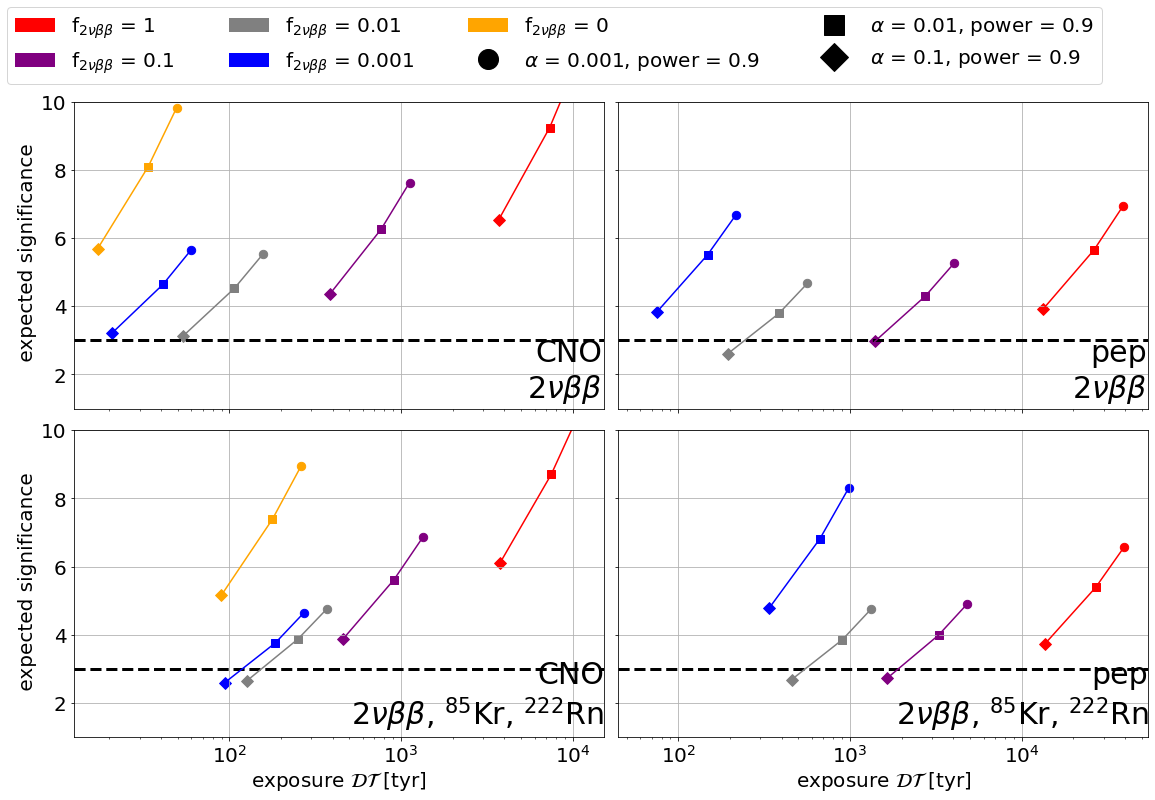

In [65]:

fig, ax = plt.subplots(ncols  = len(det_pcles), nrows = len(bg_ideals_2d),
                       figsize = (8*len(det_pcles) , 5* len(bg_ideals_2d)),
                      sharey='row', sharex = 'col')


for sig, det_pcle in enumerate(det_pcles):
    for bg, (bg_ideal_2d, bg_ideal_title) in enumerate(zip(bg_ideals_2d, bg_ideals_title)):   
        if sig == 0:
            ylabel= ' expected significance'
        else:
            ylabel= ''
            
        if bg == len(bg_ideals_2d)-1:
            xlabel = r'exposure ${\cal D}$${\cal T}$ [tyr]'
        else:
            xlabel = ''
        ax[bg][sig] = setup_cdfpdf_ax(ax[bg][sig], '', 
                       xlabel, ylabel, True, '', 20,20, vlines = [0], hlines = [3],
                                      xlims = [0,0], ylims = [1,10], log = [1,0])
        
    
        print(max(ax[bg][sig].get_xlim()))
        for m, metallicity in enumerate(metallicities):
            for n, nubb_fraction in enumerate(nubb_fractions):

                DT_index_ab = [str((alpha, power)) for alpha in alphas]
                ASIMOV_index_a = [det_pcle + '_'+bg_ideal_2d+'_'+detector+'_'+metallicity+'_nubb'+str(
                    nubb_fraction)+'_alpha'+str(alpha) for alpha in alphas]

                DTs = DT_pd.loc[DT_index_ab][det_pcle + '_'+bg_ideal_2d+'_'+detector+'_'+metallicity+'_nubb'+str(nubb_fraction) ]
                avg_zs_simalter = df_asimov.loc['z_alter_avg'][ASIMOV_index_a]
                ax[bg][sig].plot(DTs, avg_zs_simalter, c = colors[n], ls = '-')

                for a, alpha in enumerate(alphas):
                    ax[bg][sig].scatter(DT_pd.loc[str((alpha, power))][det_pcle + '_'+bg_ideal_2d+'_'+detector+'_'+metallicity+'_nubb'+str(nubb_fraction) ], 
                                    df_asimov.loc['z_alter_avg'][ det_pcle + '_'+bg_ideal_2d+'_'+detector+'_'+metallicity+'_nubb'+str(
                    nubb_fraction)+'_alpha'+str(alpha)],
                                    c = colors[n], marker = markers[a], s = 70
                                   )
        ax[bg][sig].text(max(ax[bg][sig].get_xlim()), 1.1, det_pcle+'\n'+bg_ideal_title,
                        horizontalalignment='right', verticalalignment='bottom',fontsize = 30)
    
fig.legend(custom_colors+custom_markers ,label_colors+label_markers,
           bbox_to_anchor=(0.0, 1, 0.95, .102), loc='lower left',
           ncol=4, mode="expand", borderaxespad=0., fontsize = 20)


fig.tight_layout()

In [64]:

save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'cf_Z_Asimov_regular_binning.pdf')

print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../phys685/nestfig/cf_Z_Asimov_regular_binning.pdf
